In [62]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [63]:
def get_lineout_idx(Min,Max,lineout_pos,n_grid_points):
    if lineout_pos < Min or lineout_pos > Max:
        print('Lineout position is out of range:[',Min,',',Max,']!')
        return 0
    return int((n_grid_points-1) / (Max - Min) * (lineout_pos - Min) + 0.5)

# filename = '../QuickPIC/2/Species0001/Charge_slice_0001/charge_slice_xz_00000000.h5'
def get_lineout(filename,direction,lineout_pos,code = 'QPAD'):
    with h5py.File(filename, 'r') as h5file:
        dset_name = list(h5file.keys())[1] # dset_name = 'charge_slice_xz'
        data = np.array(h5file[dset_name])
        n_grid_points_xi, n_grid_points_x = data.shape
        x_range = np.array(h5file['AXIS']['AXIS1'])
        xi_range = np.array(h5file['AXIS']['AXIS2'])

        if direction == 'transverse':
            lineout_idx_xi = get_lineout_idx(xi_range[0],xi_range[1],lineout_pos,n_grid_points_xi)
            lineout = data[lineout_idx_xi,:]
            if code == 'QuickPIC':
                lineout = lineout[1:] # get rid of the empty data in the first column

            x = np.linspace(x_range[0],x_range[1],num = len(lineout))
            return x,lineout
        elif direction == 'longitudinal':
            lineout_idx_x = get_lineout_idx(x_range[0],x_range[1],lineout_pos,n_grid_points_x)
            lineout = data[:,lineout_idx_x]

            xi = np.linspace(xi_range[0],xi_range[1],num = len(lineout))
            return xi,lineout


def select_lineout_range(x,lineout,x_min,x_max):
    if x_min < x[0] or x_max > x[-1] or x_min > x_max:
        print('Invalid lineout range!')
        return x,lineout
    x_min_idx = get_lineout_idx(x[0],x[-1],x_min,len(x)) 
    x_max_idx = get_lineout_idx(x[0],x[-1],x_max,len(x))
    return x[x_min_idx:x_max_idx+1],lineout[x_min_idx:x_max_idx+1]

# Plot focusing field lineout

In [80]:
# Get lineout 
filename_Fr = './nb0_500/16384/Fields/Fr/Merged_angle_0/fr_00000001.h5'
lineout_position = 9
x_Fr, Fr = get_lineout(filename_Fr,'transverse',lineout_position,'QPAD')

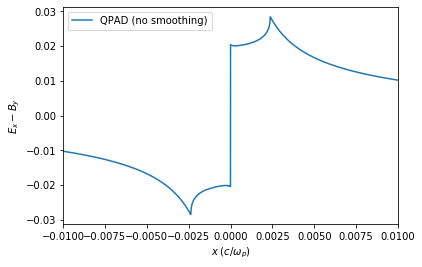

In [81]:
# select visualization range
x_min = -0.01
x_max = 0.01

# # Flip QPAD's result
L = len(Fr) // 2
# for i in range(L):
#     Fr[i] = -Fr[i]
Fr_flip = np.concatenate([-Fr[0:L],Fr[L:]])


# select visualization range
x_Fr_sub, Fr_flip_sub = select_lineout_range(x_Fr, Fr_flip, x_min, x_max)

### Plot the data
plt.plot(x_Fr_sub, Fr_flip_sub,label = 'QPAD (no smoothing)')
plt.legend(loc='best')
plt.xlabel('$x \\;(c/\\omega_p)$')
plt.xlim([x_min,x_max])
plt.ylabel('$E_x - B_y$')
plt.rcParams.update({'font.size': 10})
plt.show()

# Plot ion density lineout

In [82]:
# Get lineout 
filename_ion_density = './nb0_500/16384/Species1/Charge/Merged_angle_0/charge_00000001.h5'
lineout_position = 9
x_ni, ni = get_lineout(filename_ion_density,'transverse',lineout_position,'QPAD')

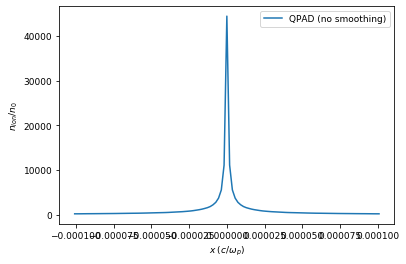

In [87]:
# select visualization range
x_min = -0.0001
x_max = 0.0001

x_ni_sub, ni_sub = select_lineout_range(x_ni, ni, x_min, x_max)

### Plot the data
plt.plot(x_ni_sub, ni_sub,label = 'QPAD (no smoothing)')
plt.legend(loc='upper right')
plt.xlabel('$x \\;(c/\\omega_p)$')
plt.ylabel('$n_{ion} /n_0$')
plt.rcParams.update({'font.size': 9})
plt.show()

# Perform a linear regression

1.8311664530291927e-06


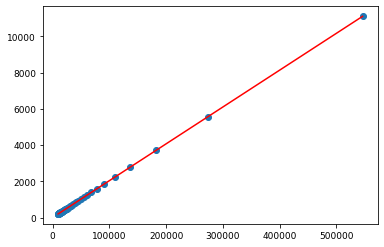

In [91]:
first_pos_idx = (len(x_ni_sub) + 1)// 2
x = x_ni_sub[first_pos_idx :]
# make sure the first x is positiv
print(x[0])
n = ni_sub[first_pos_idx :]

x_inverse = 1 / x
plt.scatter(x_inverse,n)

x_inverse = x_inverse.reshape(-1,1)
n = n.reshape(-1,1)
model = LinearRegression(fit_intercept=False)
model.fit(x_inverse,n)
n_pred = model.predict(x_inverse)
plt.plot(x_inverse, n_pred, color='red')

# Simple example of performing linear regression in Python

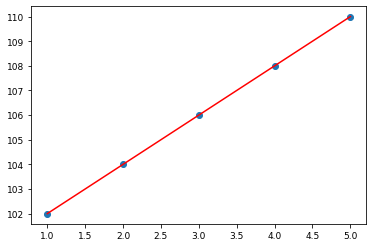

In [58]:
a = np.array([1,2,3,4,5])
b = 2 * a + 100
a = a.reshape(-1,1)
b = b.reshape(-1,1)
model = LinearRegression(fit_intercept=True)
model.fit(a,b)
b_pred = model.predict(a)

plt.scatter(a, b)
plt.plot(a, b_pred, color='red')
plt.show()